In [89]:
%matplotlib inline
import glob, re
import numpy as np
import pandas as pd
import xgboost
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [90]:
data = {
    'tra': pd.read_csv('data/air_visit_data.csv.zip', compression="zip"),
    'as': pd.read_csv('data/air_store_info.csv.zip', compression="zip"),
    'hs': pd.read_csv('data/hpg_store_info.csv.zip', compression="zip"),
    'ar': pd.read_csv('data/air_reserve.csv.zip', compression="zip"),
    'hr': pd.read_csv('data/hpg_reserve.csv.zip', compression="zip"),
    'id': pd.read_csv('data/store_id_relation.csv.zip', compression="zip"),
    'tes': pd.read_csv('data/sample_submission.csv.zip', compression="zip"),
    'hol': pd.read_csv('data/date_info.csv.zip', compression="zip").rename(columns={'calendar_date':'visit_date'})
    }

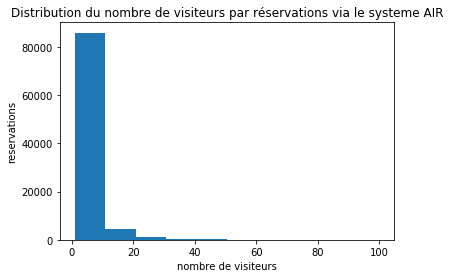

In [91]:
plot2 = plt.hist(data['ar']['reserve_visitors'])
plt.ylabel('reservations')
plt.xlabel('nombre de visiteurs')
plt.title('Distribution du nombre de visiteurs par réservations via le systeme AIR')

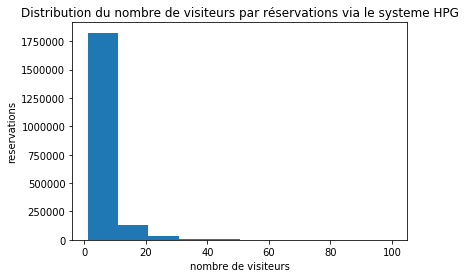

In [92]:
plot3 = plt.hist(data['hr']['reserve_visitors'])
plt.ylabel('reservations')
plt.xlabel('nombre de visiteurs')
plt.title('Distribution du nombre de visiteurs par réservations via le systeme HPG')

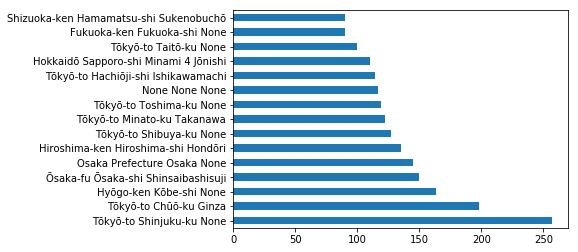

In [93]:
han = data['hs']['hpg_area_name'].value_counts().nlargest(15)
han.plot(kind = "barh")

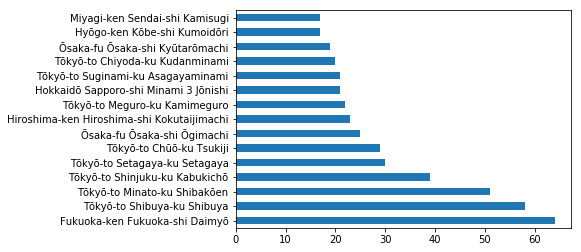

In [94]:
han = data['as']['air_area_name'].value_counts().nlargest(15)
han.plot(kind = "barh")

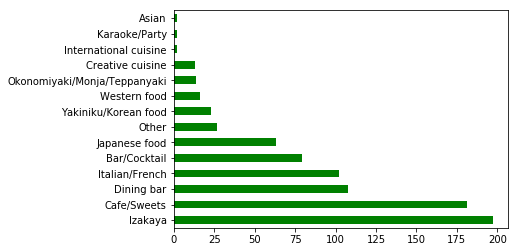

In [95]:
c = data['as']['air_genre_name'].value_counts()
c.plot(kind="barh", color = "green")

In [96]:
c1 = data['as']['air_area_name'].unique()
print(c1)

['Hyōgo-ken Kōbe-shi Kumoidōri' 'Tōkyō-to Minato-ku Shibakōen'
 'Fukuoka-ken Fukuoka-shi Daimyō' 'Tōkyō-to Setagaya-ku Setagaya'
 'Ōsaka-fu Ōsaka-shi Ōgimachi' 'Tōkyō-to Shibuya-ku Shibuya'
 'Tōkyō-to Suginami-ku Asagayaminami'
 'Hiroshima-ken Hiroshima-shi Kokutaijimachi' 'Tōkyō-to Chūō-ku Ginza'
 'Tōkyō-to Shinjuku-ku Kabukichō' 'Tōkyō-to Meguro-ku Kamimeguro'
 'Ōsaka-fu Suita-shi Izumichō' 'Tōkyō-to Tachikawa-shi Izumichō'
 'Fukuoka-ken Fukuoka-shi Hakata Ekimae'
 'Shizuoka-ken Hamamatsu-shi Motoshirochō'
 'Hokkaidō Sapporo-shi Minami 3 Jōnishi' 'Tōkyō-to Minato-ku Akasaka'
 'Tōkyō-to Chūō-ku Tsukiji' 'Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike'
 'Tōkyō-to Chiyoda-ku Kudanminami' 'Ōsaka-fu Ōsaka-shi Kyūtarōmachi'
 'Tōkyō-to Ōta-ku Kamiikedai' 'Hyōgo-ken Nishinomiya-shi Rokutanjichō'
 'Tōkyō-to Meguro-ku Takaban' 'Hokkaidō Asahikawa-shi 6 Jōdōri'
 'Tōkyō-to Adachi-ku Chūōhonchō' 'Ōsaka-fu Ōsaka-shi Shinmachi'
 'Fukuoka-ken Kurume-shi Jōnanmachi' 'Miyagi-ken Sendai-shi Kamisugi'
 'T

In [97]:
c1

array(['Hyōgo-ken Kōbe-shi Kumoidōri', 'Tōkyō-to Minato-ku Shibakōen',
       'Fukuoka-ken Fukuoka-shi Daimyō', 'Tōkyō-to Setagaya-ku Setagaya',
       'Ōsaka-fu Ōsaka-shi Ōgimachi', 'Tōkyō-to Shibuya-ku Shibuya',
       'Tōkyō-to Suginami-ku Asagayaminami',
       'Hiroshima-ken Hiroshima-shi Kokutaijimachi',
       'Tōkyō-to Chūō-ku Ginza', 'Tōkyō-to Shinjuku-ku Kabukichō',
       'Tōkyō-to Meguro-ku Kamimeguro', 'Ōsaka-fu Suita-shi Izumichō',
       'Tōkyō-to Tachikawa-shi Izumichō',
       'Fukuoka-ken Fukuoka-shi Hakata Ekimae',
       'Shizuoka-ken Hamamatsu-shi Motoshirochō',
       'Hokkaidō Sapporo-shi Minami 3 Jōnishi',
       'Tōkyō-to Minato-ku Akasaka', 'Tōkyō-to Chūō-ku Tsukiji',
       'Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike',
       'Tōkyō-to Chiyoda-ku Kudanminami',
       'Ōsaka-fu Ōsaka-shi Kyūtarōmachi', 'Tōkyō-to Ōta-ku Kamiikedai',
       'Hyōgo-ken Nishinomiya-shi Rokutanjichō',
       'Tōkyō-to Meguro-ku Takaban', 'Hokkaidō Asahikawa-shi 6 Jōdōri',
       

In [98]:
c2 = data['hs']['hpg_area_name'].unique()
print(c2)

['Tōkyō-to Setagaya-ku Taishidō' 'Hyōgo-ken Himeji-shi Tsuchiyama'
 'Tōkyō-to Chūō-ku Ginza' 'Fukuoka-ken Fukuoka-shi Minamishō'
 'Tōkyō-to Sumida-ku Tachibana' 'Hiroshima-ken Hiroshima-shi Hondōri'
 'Tōkyō-to Nerima-ku Hikawadai' 'Hyōgo-ken Kōbe-shi None'
 'Ōsaka-fu Ōsaka-shi Shinsaibashisuji' 'Tōkyō-to Shibuya-ku None'
 'Shizuoka-ken Shizuoka-shi Hinodechō' 'Ōsaka-fu Neyagawa-shi Kotobukichō'
 'Shizuoka-ken Numazu-shi Yanagisawa' 'Tōkyō-to Taitō-ku None'
 'Tōkyō-to Kōtō-ku Minamisuna' 'Fukuoka-ken Fukuoka-shi None'
 'Tōkyō-to Shinjuku-ku None' 'Shizuoka-ken Hamamatsu-shi Sukenobuchō'
 'Ōsaka-fu Ōsaka-shi Nakanochō' 'Ōsaka-fu Sakai-shi None'
 'Hyōgo-ken Nishinomiya-shi Okadayama'
 'Hyōgo-ken Kōbe-shi Tainohata Higashimachi' 'Tōkyō-to Kita-ku Higashijūjō'
 'Tōkyō-to Bunkyō-ku Kōraku' 'None None None'
 'Kanagawa-ken Yokohama-shi Nagatsutachō'
 'Hokkaidō Sapporo-shi Minami 4 Jōnishi' 'Miyagi-ken Sendai-shi None'
 'Ōsaka-fu Ōsaka-shi Awajimachi' 'Tōkyō-to Chiyoda-ku None'
 'Niigata-ken Ni

In [99]:
c2 = list(c2)
c1 = list(c1)

In [100]:
list(set(c2)-set(c1))

['Tōkyō-to Tama-shi Tsurumaki',
 'Niigata-ken Jōetsu-shi Minamitaya Shinden',
 'Fukuoka-ken Fukuoka-shi None',
 'Tōkyō-to Hachiōji-shi Ishikawamachi',
 'Tōkyō-to Kokubunji-shi Nishikoigakubo',
 'Miyagi-ken Sendai-shi Miyamachi',
 'Tōkyō-to Minato-ku Kitaaoyama',
 'Tōkyō-to Setagaya-ku Taishidō',
 'Tōkyō-to Chūō-ku None',
 'Ōsaka-fu Sakai-shi Kobirao',
 'Tōkyō-to Setagaya-ku None',
 'Ōsaka-fu Ōsaka-shi Hannanchō',
 'Hokkaidō Asahikawa-shi Higashi 6 Jō',
 'Tōkyō-to Chōfu-shi Fujimichō',
 'Hokkaidō Sapporo-shi None',
 'Tōkyō-to Minato-ku Takanawa',
 'Hyōgo-ken Nishinomiya-shi Okadayama',
 'Hyōgo-ken Kōbe-shi Mikage Nakamachi',
 'Ōsaka-fu Suita-shi Enokichō',
 'Saitama-ken Niiza-shi Nodera',
 'Niigata-ken Nagaoka-shi Rokusho',
 'Hiroshima-ken Hiroshima-shi Hondōri',
 'Miyagi-ken Sendai-shi Ichibanchō',
 'Hokkaidō Sapporo-shi Hondōri (Kita)',
 'Fukuoka-ken Kurume-shi Higashimachi',
 'None None None',
 'Osaka Prefecture Osaka None',
 'Tōkyō-to Hino-shi Ochikawa',
 'Shizuoka-ken Hamamatsu-shi

In [101]:
#Merge between hpg and id_
data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])

In [111]:
%%time 
#convert to datetime + creation de "reserve_datetime_diff"
for df in ['ar','hr']:
    data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])
    data[df]['visit_datetime'] = data[df]['visit_datetime'].dt.date
    data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
    data[df]['reserve_datetime'] = data[df]['reserve_datetime'].dt.date
    data[df]['reserve_datetime_diff'] = data[df].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    # Ajout de la somme (tmp1) et de la moyenne (tmp2) du nombre de visiteurs et de reserve_datetime_diff par visites
    tmp1 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1'})
    tmp2 = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].mean().rename(columns={'visit_datetime':'visit_date', 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2'})
    

CPU times: user 3.32 s, sys: 13.2 ms, total: 3.34 s
Wall time: 3.34 s


In [112]:
tmp1.head(5)

,air_store_id,visit_date,rs1,rv1
0,air_00a91d42b08b08d9,2016-01-14,3,2
1,air_00a91d42b08b08d9,2016-01-15,6,4
2,air_00a91d42b08b08d9,2016-01-16,3,2
3,air_00a91d42b08b08d9,2016-01-22,3,2
4,air_00a91d42b08b08d9,2016-01-29,6,5


In [ ]:
data[df] = pd.merge(tmp1, tmp2, how='inner', on=['air_store_id','visit_date'])

In [79]:
#convert train date into datetime
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek
data['tra']['year'] = data['tra']['visit_date'].dt.year
data['tra']['month'] = data['tra']['visit_date'].dt.month
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date

In [80]:
#convert test date into datetime
data['tes']['visit_date'] = data['tes']['id'].map(lambda x: str(x).split('_')[2])
data['tes']['air_store_id'] = data['tes']['id'].map(lambda x: '_'.join(x.split('_')[:2]))
data['tes']['visit_date'] = pd.to_datetime(data['tes']['visit_date'])
data['tes']['dow'] = data['tes']['visit_date'].dt.dayofweek
data['tes']['year'] = data['tes']['visit_date'].dt.year
data['tes']['month'] = data['tes']['visit_date'].dt.month
data['tes']['visit_date'] = data['tes']['visit_date'].dt.date

In [82]:
#Creation des unique_store dataset
unique_stores = data['tes']['air_store_id'].unique()
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

In [88]:
stores['dow'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [10]:
# creation of min, mean, median, max and count visitors for every air_store_id
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 

stores = pd.merge(stores, data['as'], how='left', on=['air_store_id']) 

In [11]:
stores['air_genre_name'] = stores['air_genre_name'].map(lambda x: str(str(x).replace('/',' ')))
stores['air_area_name'] = stores['air_area_name'].map(lambda x: str(str(x).replace('-',' ')))
#Label encoder pour les air_genre_name and air_area_name
lbl = preprocessing.LabelEncoder()
for i in range(10):
    stores['air_genre_name'+str(i)] = lbl.fit_transform(stores['air_genre_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
    stores['air_area_name'+str(i)] = lbl.fit_transform(stores['air_area_name'].map(lambda x: str(str(x).split(' ')[i]) if len(str(x).split(' '))>i else ''))
stores['air_genre_name'] = lbl.fit_transform(stores['air_genre_name'])
stores['air_area_name'] = lbl.fit_transform(stores['air_area_name'])

In [12]:
#convert date to datetime in holiday dataset
data['hol']['visit_date'] = pd.to_datetime(data['hol']['visit_date'])
data['hol']['day_of_week'] = lbl.fit_transform(data['hol']['day_of_week'])
data['hol']['visit_date'] = data['hol']['visit_date'].dt.date

In [13]:
#creation of train and test by merging train/test and stores dataset
train = pd.merge(data['tra'], data['hol'], how='left', on=['visit_date']) 
test = pd.merge(data['tes'], data['hol'], how='left', on=['visit_date']) 
train = pd.merge(train, stores, how='left', on=['air_store_id','dow']) 
test = pd.merge(test, stores, how='left', on=['air_store_id','dow'])

In [16]:
train.head()

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,air_genre_name0,air_area_name0,air_genre_name1,air_area_name1,air_genre_name2,air_area_name2,air_genre_name3,air_area_name3,air_genre_name4,air_area_name4,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1,6,0,7.0,23.843750,25.0,57.0,64.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1,4,0,2.0,20.292308,21.0,54.0,65.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1,0,0,4.0,34.738462,35.0,61.0,65.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1,2,0,6.0,27.651515,27.0,53.0,66.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1,1,0,2.0,13.754386,12.0,34.0,57.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
for df in ['ar','hr']:
    train = pd.merge(train, data[df], how='left', on=['air_store_id','visit_date']) 
    test = pd.merge(test, data[df], how='left', on=['air_store_id','visit_date'])

In [27]:
# SUM 'reserve_datetime_diff': 'rs1', 'reserve_visitors':'rv1' 
# MEAN 'reserve_datetime_diff': 'rs2', 'reserve_visitors':'rv2' 
data['ar']

,air_store_id,visit_date,rs1,rv1,rs2,rv2
0,air_00a91d42b08b08d9,2016-10-31,0,2,0.000000,2.000000
1,air_00a91d42b08b08d9,2016-12-05,4,9,4.000000,9.000000
2,air_00a91d42b08b08d9,2016-12-14,6,18,6.000000,18.000000
3,air_00a91d42b08b08d9,2016-12-17,6,2,6.000000,2.000000
4,air_00a91d42b08b08d9,2016-12-20,2,4,2.000000,4.000000
5,air_00a91d42b08b08d9,2017-02-18,5,9,5.000000,9.000000
6,air_00a91d42b08b08d9,2017-02-23,2,12,2.000000,12.000000
7,air_00a91d42b08b08d9,2017-03-01,11,3,11.000000,3.000000
8,air_00a91d42b08b08d9,2017-03-14,0,4,0.000000,4.000000
9,air_00a91d42b08b08d9,2017-03-21,5,3,5.000000,3.000000


In [26]:
print(train['rs1_x'].values != "NaN")

True


/Users/jordanvidal/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [28]:
#Recuperation des id des store present dans le train
train['id'] = train.apply(lambda r: '_'.join([str(r['air_store_id']), str(r['visit_date'])]), axis=1)

#Calcul de la somme, moyenne du nombre de visiteurs + moyenne du nombres de jours d'ecart entre reservation et visite au restaurant
train['total_reserv_sum'] = train['rv1_x'] + train['rv1_y']
train['total_reserv_mean'] = (train['rv2_x'] + train['rv2_y']) / 2
train['total_reserv_dt_diff_mean'] = (train['rs2_x'] + train['rs2_y']) / 2

test['total_reserv_sum'] = test['rv1_x'] + test['rv1_y']
test['total_reserv_mean'] = (test['rv2_x'] + test['rv2_y']) / 2
test['total_reserv_dt_diff_mean'] = (test['rs2_x'] + test['rs2_y']) / 2

In [29]:
# NEW FEATURES 
# 
train['date_int'] = train['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test['date_int'] = test['visit_date'].apply(lambda x: x.strftime('%Y%m%d')).astype(int)
train['var_max_lat'] = train['latitude'].max() - train['latitude']
train['var_max_long'] = train['longitude'].max() - train['longitude']
test['var_max_lat'] = test['latitude'].max() - test['latitude']
test['var_max_long'] = test['longitude'].max() - test['longitude']

In [30]:
# NEW FEATURES FROM Georgii Vyshnia
train['lon_plus_lat'] = train['longitude'] + train['latitude'] 
test['lon_plus_lat'] = test['longitude'] + test['latitude']

In [31]:
lbl = preprocessing.LabelEncoder()
train['air_store_id2'] = lbl.fit_transform(train['air_store_id'])
test['air_store_id2'] = lbl.transform(test['air_store_id'])

In [32]:
col = [c for c in train if c not in ['id', 'air_store_id', 'visit_date','visitors']]
train = train.fillna(-1)
test = test.fillna(-1)

In [35]:
%%time
model1 = ensemble.GradientBoostingRegressor(learning_rate=0.2, random_state=3, n_estimators=200, subsample=0.8, max_depth =10)
model1.fit(train[col], np.log1p(train['visitors'].values))
preds1 = model1.predict(train[col])
print('RMSE GradientBoostingRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds1))

RMSE GradientBoostingRegressor:  0.347931051695
CPU times: user 18min 19s, sys: 1.49 s, total: 18min 21s
Wall time: 18min 23s


In [33]:
%%time
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred)**0.5

model3 = XGBRegressor(learning_rate=0.2, random_state=3, n_estimators=250, subsample=0.8, colsample_bytree=0.8, max_depth =10)
model3.fit(train[col], np.log1p(train['visitors'].values))
preds3 = model3.predict(train[col])
print('RMSE XGBRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds3))

RMSE XGBRegressor:  0.438197429237
CPU times: user 4min 20s, sys: 1.26 s, total: 4min 22s
Wall time: 4min 23s


In [36]:
%%time
model2 = neighbors.KNeighborsRegressor(n_jobs=-1, n_neighbors=4)
model2.fit(train[col], np.log1p(train['visitors'].values))
preds2 = model2.predict(train[col])
print('RMSE KNeighborsRegressor: ', RMSLE(np.log1p(train['visitors'].values), preds2))

RMSE KNeighborsRegressor:  0.419451716114
CPU times: user 5min 36s, sys: 2.39 s, total: 5min 38s
Wall time: 4min 50s


In [34]:
dfs = { re.search('/([^/\.]*)\.csv', fn).group(1):
    pd.read_csv(fn)for fn in glob.glob('data/*.csv.zip')}